# About Dataset
Descrição do dataset a respeito dos atributos

 1. Id: bla bla
 2. MSSubClass: The building class

# Notebook Objectives

Goal of the notebook is to:
 1. Explore every feature in the dataset;
 2. Bla Bla Bla

# Table of Contents

# Import Necessary Libraries

In [23]:
# Basic Libraries
import os
import git

# Data Manipulation and Calculation
import pandas as pd
import numpy as np
from scipy.stats import mode

# Libraries for data visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [24]:
# Função para encontrar diretório do repositório git
def get_git_root(path) -> str:
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root


# Diretório do repositório git
git_dir = get_git_root(os.getcwd())

# Diretório dos dados
data_dir = os.path.join(git_dir, "data")

# Leitura dos arquivos de treinamento e teste
df_train = pd.read_csv(os.path.join(data_dir, "train.csv"))
df_test = pd.read_csv(os.path.join(data_dir, "test.csv"))

## Train data

In [25]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
print("Quantity of Attributes:", df_train.shape[1])
print("Quantity of Objects:", df_train.shape[0])

Quantity of Attributes: 81
Quantity of Objects: 1460


## Test data

In [27]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
print("Quantity of Attributes:", df_test.shape[1])
print("Quantity of Objects:", df_test.shape[0])

Quantity of Attributes: 80
Quantity of Objects: 1459


In [51]:
#Verificar se há dados faltantes na base

#print(df_train.isnull().sum()) #Simples e direto, porém não tão visual. df

null_sums = df_train.isnull().sum()
null_cols = null_sums[null_sums > 0]
num_instances = len(df_train)
for col_name, col_sum in null_cols.items():
    percent_missing = round((col_sum / num_instances) * 100, 2)
    print(f"{col_name}: {col_sum} ({percent_missing}%)")

LotFrontage: 259 (17.74%)
Alley: 1369 (93.77%)
MasVnrType: 8 (0.55%)
MasVnrArea: 8 (0.55%)
BsmtQual: 37 (2.53%)
BsmtCond: 37 (2.53%)
BsmtExposure: 38 (2.6%)
BsmtFinType1: 37 (2.53%)
BsmtFinType2: 38 (2.6%)
Electrical: 1 (0.07%)
FireplaceQu: 690 (47.26%)
GarageType: 81 (5.55%)
GarageYrBlt: 81 (5.55%)
GarageFinish: 81 (5.55%)
GarageQual: 81 (5.55%)
GarageCond: 81 (5.55%)
PoolQC: 1453 (99.52%)
Fence: 1179 (80.75%)
MiscFeature: 1406 (96.3%)


In [55]:
# Em existindo dados faltantes, crie duas novas bases a partir da original, em que não existam dados faltantes usando dois métodos diferentes;

#MÉTODO 1 DE LIMPEZA DE DADOS FALTANTES (PRIMEIRA BASE A SER CRIADA)
df_missing_1 = df_train.dropna() #Método mais comum encontrado nos livros e exemplos vistos
print('##################### MÉTODO 1 - DROPNA #####################')
print(df_missing_1)
print('################## FIM DO MÉTODO 1 - DROPNA ##################\n\n\n')
#FIM DO MÉTODO 1 DE LIMPEZA DE DADOS FALTANTES (PRIMEIRA BASE A SER CRIADA)

#MÉTODO 2 DE LIMPEZA DE DADOS FALTANTES (SEGUNDA BASE A SER CRIADA)
df_missing_2 = df_train.fillna(df_train.mean()) #Método de preechimento (imputação) de dados faltantes. Nesse caso foi utilizado como exemplo a média
print('##################### MÉTODO 2 - IMPUTAÇÃO DA MÉDIA #####################')
print(df_missing_2) 
print('################## FIM DO MÉTODO 2 - IMPUTAÇÃO DA MÉDIA ##################')
#FIM DO MÉTODO 2 DE LIMPEZA DE DADOS FALTANTES (SEGUNDA BASE A SER CRIADA)

##################### MÉTODO 1 - DROPNA #####################
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, Sa

C:\Users\tavar\AppData\Local\Temp\ipykernel_15784\2690255015.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [56]:
#Verificar nova quantidade de dados faltantes em df_missing_2

null_sums = df_missing_2.isnull().sum()
null_cols = null_sums[null_sums > 0]
num_instances = len(df_missing_2)
for col_name, col_sum in null_cols.items():
    percent_missing = round((col_sum / num_instances) * 100, 2)
    print(f"{col_name}: {col_sum} ({percent_missing}%)")

Alley: 1369 (93.77%)
MasVnrType: 8 (0.55%)
BsmtQual: 37 (2.53%)
BsmtCond: 37 (2.53%)
BsmtExposure: 38 (2.6%)
BsmtFinType1: 37 (2.53%)
BsmtFinType2: 38 (2.6%)
Electrical: 1 (0.07%)
FireplaceQu: 690 (47.26%)
GarageType: 81 (5.55%)
GarageFinish: 81 (5.55%)
GarageQual: 81 (5.55%)
GarageCond: 81 (5.55%)
PoolQC: 1453 (99.52%)
Fence: 1179 (80.75%)
MiscFeature: 1406 (96.3%)


# Univariate Analysis

## Categorical Columns

MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood

### Zoning classification of the sale

In [29]:
df = df_train.copy()

replace_values = {
    "A": "Agriculture",
    "C (all)": "Commercial",
    "FV": "Floating Village Residential",
    "I": "Industrial",
    "RH": "Residential High Density",
    "RL": "Residential Low Density",
    "RP": "Residential Low Density Park ",
    "RM": "Residential Medium Density",
}

inverted_replace_values = {v: k for k, v in replace_values.items()}


df["MSZoning"].replace(replace_values, inplace=True)

zn_classification = df["MSZoning"].value_counts()

inverted_replace_values[zn_classification.index[0]] = zn_classification.index[0]

fig = go.Figure(
    data=[
        go.Pie(
            labels=zn_classification.index,
            values=zn_classification.values,
            marker=dict(colors=px.colors.sequential.Turbo),
        )
    ]
)


fig.update_traces(
    hole=0.33,
    textinfo="none",
    texttemplate="%{label} <br> %{value} (%{percent:.1%})",
)
fig.update_layout(
    title={
        "text": "Zoning classification according number of sales",
        "y": 0.95,
    },
    margin=dict(l=2, r=330, b=0),
    height=450,
    width=1100,
)


fig.show()

## Numeric Columns

In [30]:
# TODO: List numeric columns

### Sales Price

C:\Users\tavar\AppData\Local\Temp\ipykernel_15784\1991694502.py:47: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



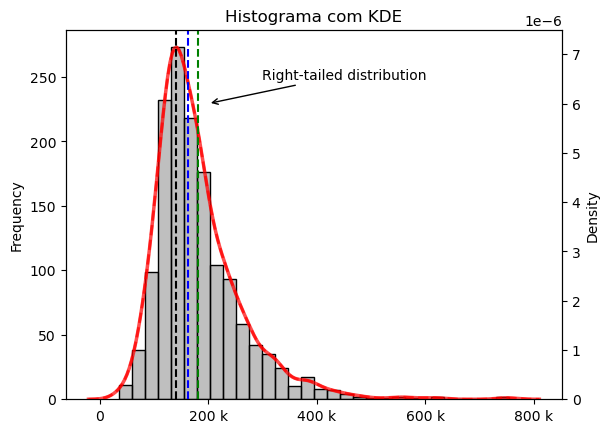

In [31]:
df = df_train.copy()

# Sale Price values
sale_price = df["SalePrice"].values


# plt.hist(sale_price, bins=30, density=True, alpha=0.5, color="gray")
sns.histplot(sale_price, bins=30, alpha=0.5, color="gray")

# Change y label
plt.gca().set_ylabel("Frequency")

# Create a second y-axis for the KDE plot
ax2 = plt.gca().twinx()

sns.kdeplot(sale_price, color="red", label="KDE", lw=2, ls="--", alpha=0.7, ax=ax2)

sns.kdeplot(
    sale_price,
    color="red",
    label="KDE",
    lw=2.5,
    ls="-",
    alpha=0.7,
)

# Format x-axis in engineering notation
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())


# Add title and labels
plt.title("Histograma com KDE")
plt.xlabel("Sale price value")

ax2.set_ylabel("Density")

plt.annotate(
    "Right-tailed distribution",
    xy=(200e3, 6e-6),
    xytext=(300e3, 6.5e-6),
    arrowprops=dict(facecolor="black", arrowstyle="->"),
)

# Calculate mean, median and mode
mean = np.mean(sale_price)
median = np.median(sale_price)
mode = mode(sale_price)[0]

# Traçar linhas verticais indicando a média, mediana e moda
plt.axvline(mean, color="green", linestyle="--", label="Mean")
plt.axvline(median, color="blue", linestyle="--", label="Median")
plt.axvline(mode, color="black", linestyle="--", label="Mode")

plt.show()

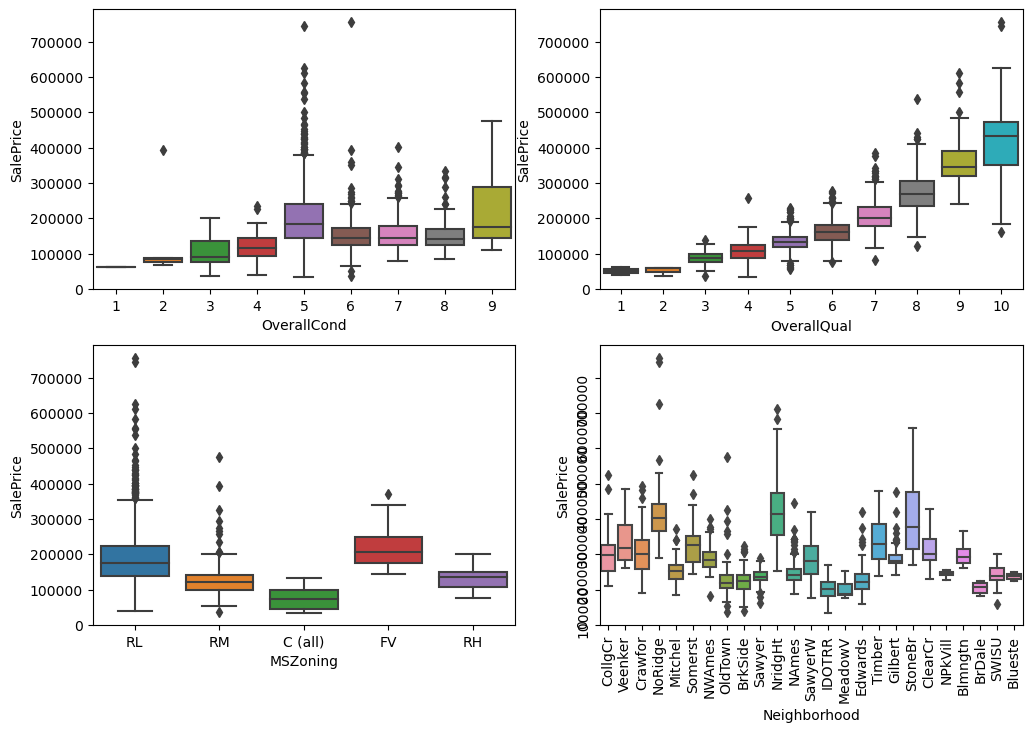

In [36]:
#Análise univariável tendo SalePrice como foco.


#definindo o tamanho da matriz de gráficos, não de cada gráfico individualmente.
fig = plt.figure(figsize=(12, 8))


# CHART 1
fig.add_subplot(221)
sns.boxplot(x='OverallCond', y='SalePrice', data=df_train)

                 
# CHART 2
fig.add_subplot(222)
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)


# CHART 3
fig.add_subplot(223)
sns.boxplot(x='MSZoning', y='SalePrice', data=df_train)

# CHART 4
fig.add_subplot(224)
ax224=sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train) ## Note I added ax222

## Rotate ax222 by 90 degrees
ax224.tick_params(labelrotation=90)

<AxesSubplot:xlabel='Neighborhood', ylabel='OverallCond'>

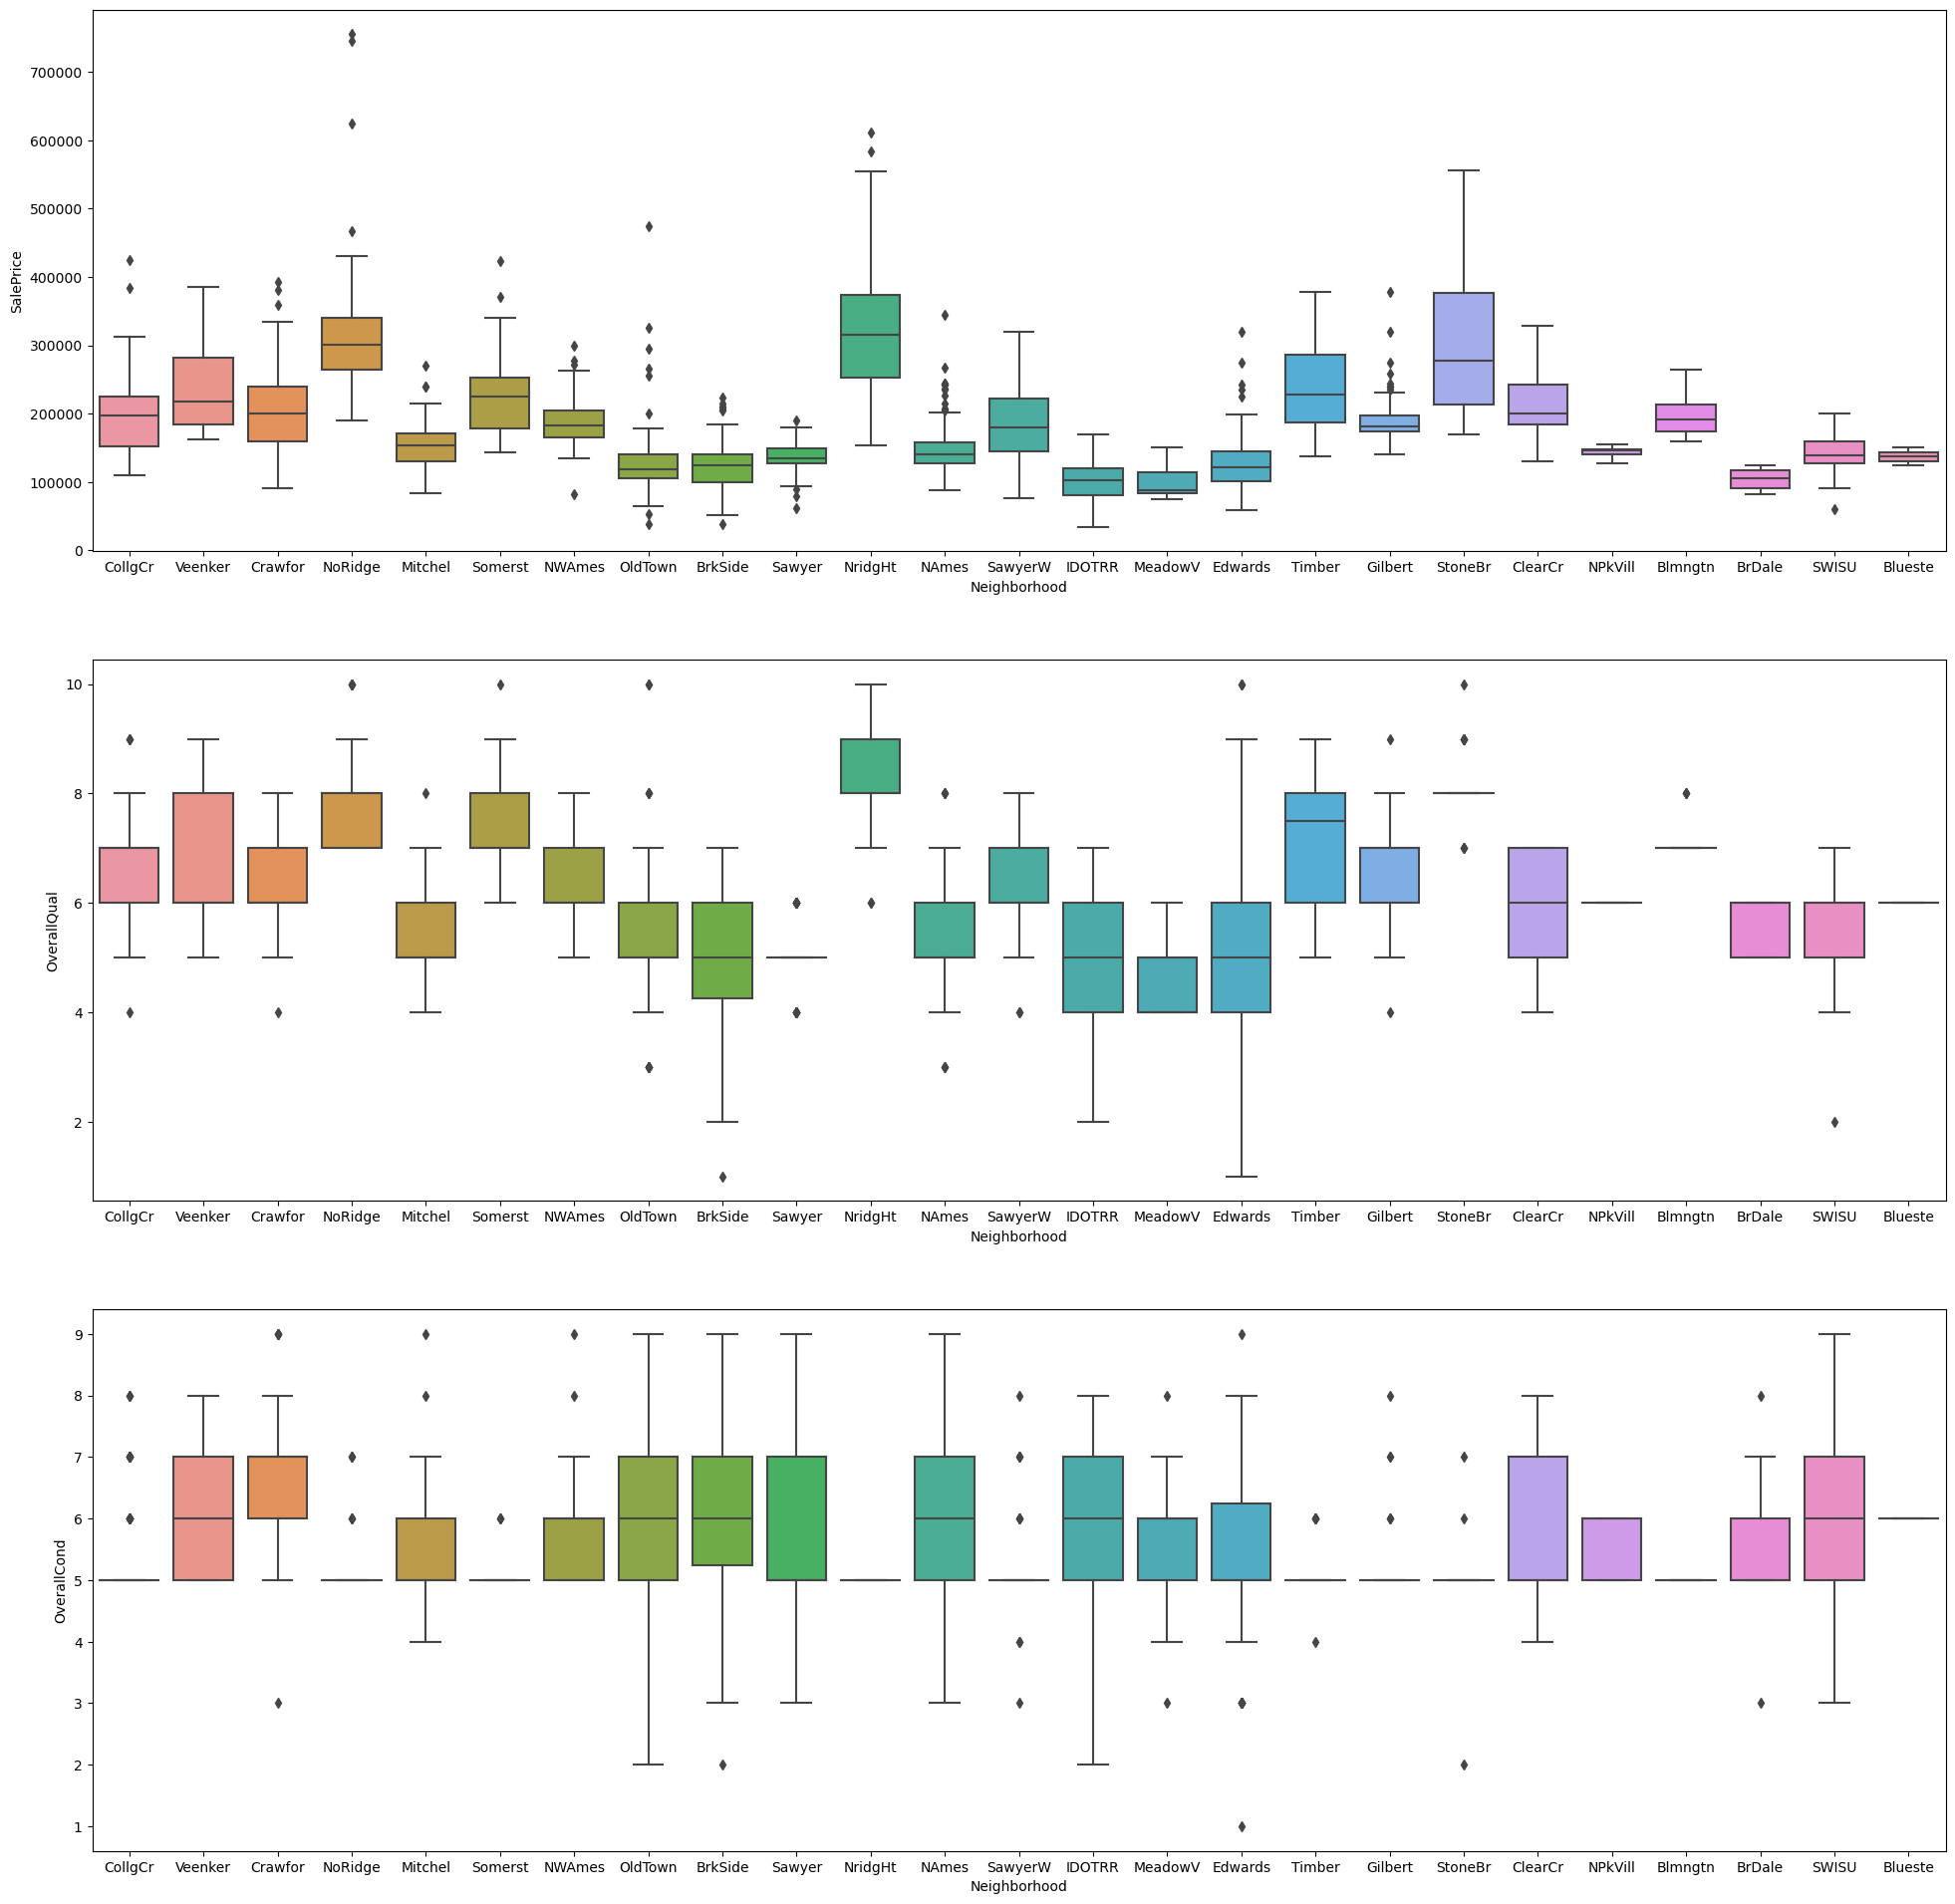

In [33]:
#Análise univariável tendo Neighborhood como foco.
#INSIGHTS:  Se eu quiser especular com preço e imóvel, eu iria no bairro de StoneBr e NridgHt, onde tem a maior variação entre as sombras do boxplot.
            #Provavelmente em NridgHt, devido a variação de OverallQual o mais provável seja comprar um imóvel a aplicar melhorias para aumentar o SalePrice, enquanto em StoneBr, devido a baixa variação de OverallQual as compras se deem por oportunidade e menos por perspectivas de melhorias


#definindo o tamanho das figuras
fig = plt.figure(figsize=(24, 24))

# Gráfico 1 - Barras de Count
fig.add_subplot(311)
#sns.countplot(df_train['MSZoning'])
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)
                 
# Gráfico 2 - Boxplot de Reason
fig.add_subplot(312)
#sns.boxplot(x='MSZoning', y='SalePrice', data=df_train)
sns.boxplot(x='Neighborhood', y='OverallQual', data=df_train)

# Gráfico 3 - Boxplot de Absences
fig.add_subplot(313)
#sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)
sns.boxplot(x='Neighborhood', y='OverallCond', data=df_train)

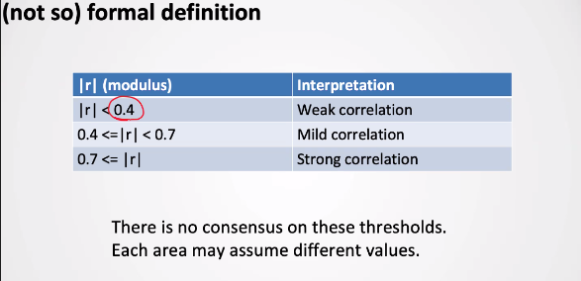

<AxesSubplot:>

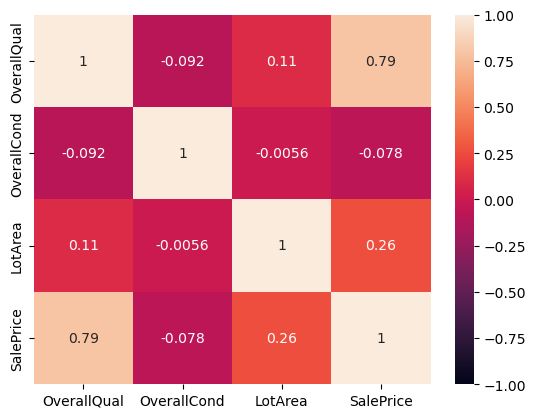

In [34]:
#CORRELAÇÃO ENTRE OVERALLQUAL e OVERALLCOND, LOTAREA, SALEPRICE
#INSIGHT: Somente OverallQual influencia diretamente o SalePrice. O resto não tem força para isso.
df_corr = df_train[['OverallQual', 'OverallCond', 'LotArea', 'SalePrice']]
correlation = df_corr.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [35]:
#TESTE PUSH